In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import identify_nominal_columns

## 1 Data Cleaning & Explorative Data Analysis (EDA)
    1.1 Dirty records
    1.2 Missing(NaN) value
    1.3 records against the correctness of string values(descripiton)
    1.4 Categorical Attributes tranformation:
    1.5 feature engineering (undone)
    1.6 noise detection (undone)

In [3]:
raw_data_train = pd.read_csv('train.csv')
raw_data_train.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


### 1.1 Handling missing value
* `tenure`: 1723 records. Delete the entire columns. (doubtful)
* `built_year`: 922 records. Fill in the year with the same property name and the mean building year of entire samples in case without transcation in the same property.
* `num_beds`: 80 records.
* `num_baths`: 434 records.
* `floor_level`: 16746 records.
* `available_unit_types`: 1441 records.
* `total_num_units`: 5652 records.
* `subzone` and `planning_area`: both 113 records.

In [4]:
## convert to all lowercase first.

df_lowercase = raw_data_train.copy()

## lowercase all categotical value
categorical_features=identify_nominal_columns(df_lowercase)
for feature in categorical_features:
    df_lowercase[feature] = df_lowercase[feature].str.lower()

df_lowercase.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


In [5]:
raw_data_train.isna().any()

listing_id              False
title                   False
address                 False
property_name           False
property_type           False
tenure                   True
built_year               True
num_beds                 True
num_baths                True
size_sqft               False
floor_level              True
furnishing              False
available_unit_types     True
total_num_units          True
property_details_url    False
lat                     False
lng                     False
elevation               False
subzone                  True
planning_area            True
price                   False
dtype: bool

## 1.1.1 num_beds & num_baths

In [26]:
df_no_nan = df_lowercase.copy()

# drop some columns directly
droplist = ['listing_id', 'title', 'elevation','floor_level', 'available_unit_types', 'total_num_units', 'property_details_url']

df_no_nan.drop(columns=droplist, inplace=True)
df_no_nan.head()

,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,lat,lng,subzone,planning_area,price
0,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,unspecified,1.414399,103.837196,yishun south,yishun,514500.0
1,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,unspecified,1.372597,103.875625,serangoon north,serangoon,995400.0
2,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,partial,1.298773,103.895798,mountbatten,marine parade,8485000.0
3,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958,partial,1.312364,103.803271,farrer court,bukit timah,2626000.0
4,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,unspecified,1.273959,103.843635,anson,downtown core,1764000.0


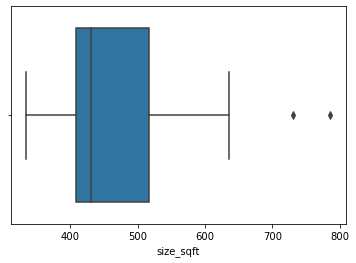

In [27]:
sns.boxplot(data=df_no_nan.loc[(df_no_nan.num_beds.isna()) & (df_no_nan.size_sqft <= 800)], x='size_sqft')
upper = np.percentile(df_no_nan.loc[df_no_nan.num_beds.isna(),'size_sqft'], 75)
df_no_nan.loc[(df_no_nan.num_beds.isna()) & (df_no_nan.size_sqft <= upper), 'num_beds'] = 0

<AxesSubplot:xlabel='num_beds', ylabel='property_name'>

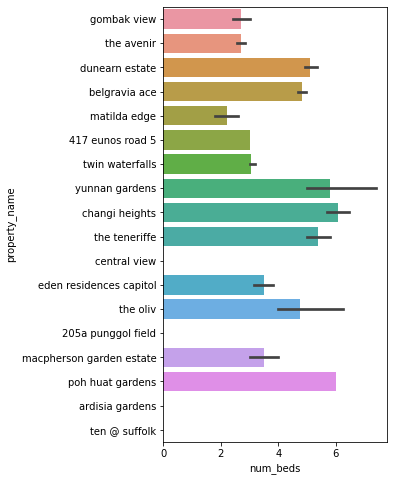

In [28]:
plt.figure(figsize=(4,8))
pn = df_no_nan['property_name'][df_no_nan.num_beds.isna()].unique()
check1 = df_no_nan.loc[np.in1d(df_no_nan['property_name'],pn)]
sns.barplot(data=check1, x='num_beds', y='property_name')

In [30]:
df_no_nan.loc[np.in1d(df_no_nan['property_name'],check1['property_name'].drop_duplicates(keep=False).to_list()), 'num_beds'] = 0
df_no_nan.sort_values(by=['property_name', 'size_sqft','num_beds'], ascending=False, inplace=True)
df_no_nan['num_beds'].fillna(method='ffill', inplace=True)
df_no_nan['num_beds'].value_counts()

3.0     7940
2.0     4365
4.0     3571
1.0     1684
5.0     1628
6.0      768
7.0      148
0.0       64
8.0       41
10.0      29
9.0       16
Name: num_beds, dtype: int64

In [24]:
df_no_nan.sort_values(by=['property_name','size_sqft','num_baths'], ascending=False, inplace=True)
df_no_nan['num_baths'].fillna(method='ffill', inplace=True)
df_no_nan['num_baths'].value_counts()

2.0     9972
3.0     3150
1.0     3048
4.0     1754
5.0      937
6.0      854
7.0      383
8.0       96
9.0       35
10.0      25
Name: num_baths, dtype: int64

In [31]:
def map_value_by_most_common(df, attr, group):
    na_mask = df[attr].isna()
    size_attr_by_type = df.groupby([group, attr]).size()
    attr_by_type_mapping = size_attr_by_type.reset_index(level=0).groupby(group).agg(most_common = (0, 'idxmax'))
    attr_mapping_dict = attr_by_type_mapping.reset_index().set_index(group).to_dict()['most_common']
    print(attr_mapping_dict)
    df[attr] = df.apply(lambda x: attr_mapping_dict[x[group]] if (pd.isna(x[attr]) and x[group] in attr_mapping_dict) else x[attr], axis=1)
    print('Final na', attr, df[attr].isna().sum())
    print(df[attr].value_counts())
    return df

df_train_nona = map_value_by_most_common(df_no_nan, 'num_baths', 'num_beds')

{0.0: 1.0, 1.0: 1.0, 2.0: 2.0, 3.0: 2.0, 4.0: 3.0, 5.0: 5.0, 6.0: 6.0, 7.0: 6.0, 8.0: 8.0, 9.0: 6.0, 10.0: 10.0}
Final na num_baths 0
2.0     10031
3.0      3137
1.0      2967
4.0      1743
5.0       977
6.0       861
7.0       382
8.0        96
9.0        35
10.0       25
Name: num_baths, dtype: int64
